# Sage Shaw

### ME 571 - Spring 2018

# HW 2 - Problem 3

In [1]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import subprocess
import scipy as sp
import scipy.sparse
import scipy.sparse.linalg
import timeit

In [80]:
%%bash
mpicc demo_util.c hw3p1_sage.c -o hw3p1_sage -lm
mpirun -n 4 ./hw3p1_sage -p 5 --itermax 100000 --tol 1.0e-10 > results_sage.csv

iterations: 47362
residual: 9.99967e-11
nodes: 130
error: 0.000395044


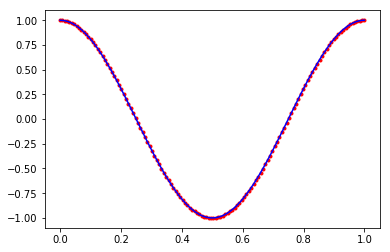

In [81]:
A = np.genfromtxt('results_sage.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

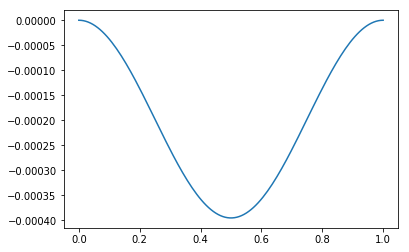

In [82]:
plt.plot(x, A - np.cos(2*np.pi*x))

In [95]:
%%bash
mpicc demo_util.c hw3p1_node.c -o hw3p1_node -lm
mpirun -n 4 ./hw3p1_node -p 5 --itermax 100000 --tol 1.0e-10 > results_node.csv

iterations: 46007
residual: 9.99922e-11
nodes: 128
error: 0.000407605


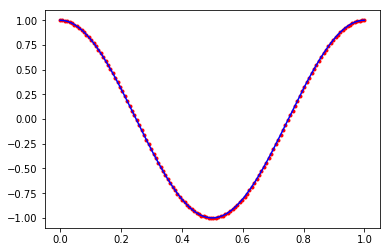

In [96]:
A = np.genfromtxt('results_node.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
print("nodes: %d" % len(A))
x = np.linspace(0,1,len(A))
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

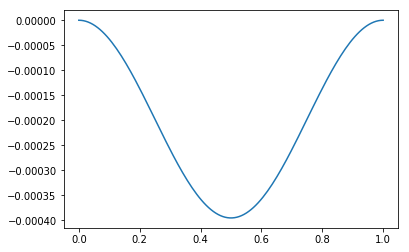

In [86]:
plt.plot(x, A - np.cos(2*np.pi*x))

In [116]:
%%bash
mpicc demo_util.c hw3p1_cell.c -o hw3p1_cell -lm
mpirun -n 4 ./hw3p1_cell -p 5 --itermax 1000000 --tol 1.0e-10 > results_cell.csv

iterations: 64937
residual: 9.99932e-11
cells: 128
error: 0.000301181


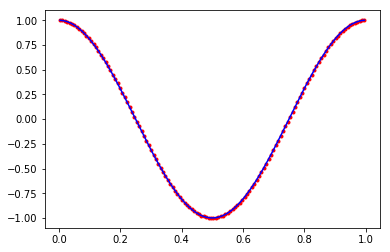

In [125]:
A = np.genfromtxt('results_cell.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

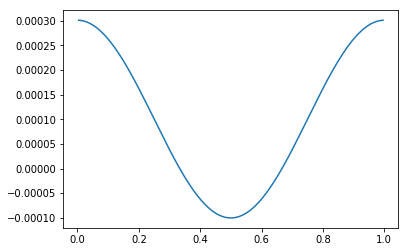

In [126]:
plt.plot(x, A - np.cos(2*np.pi*x))

In [106]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 2 --itermax 1000000 --tol 1.0e-10 > results_cell_16.csv

In [45]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 3 --itermax 1000000 --tol 1.0e-10 > results_cell_32.csv

In [46]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 4 --itermax 1000000 --tol 1.0e-10 > results_cell_64.csv

In [47]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 5 --itermax 1000000 --tol 1.0e-10 > results_cell_128.csv

In [48]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 6 --itermax 1000000 --tol 1.0e-10 > results_cell_256.csv

In [49]:
%%bash
mpirun -n 4 ./hw3p1_cell -p 7 --itermax 1000000 --tol 1.0e-10 > results_cell_512.csv

iterations: 64937
residual: 9.99932e-11
cells: 128
error: 0.000301181


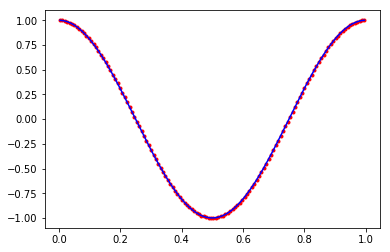

In [127]:
A = np.genfromtxt('results_cell_128.csv', delimiter=',')
print("iterations: %d" % A[-2])
print("residual: %g" % A[-1])
A = A[:-2]
cells = len(A)
h = 1/cells
print("cells: %d" % len(A))
x = np.linspace(h/2,1-h/2,cells)
print("error: %g" % np.max(np.abs(A - np.cos(2*np.pi*x))))
plt.plot(x,A,'r.')
plt.plot(x, np.cos(2*np.pi*x), 'b-')

In [130]:
data = {}
columns = ['P', 'N', 'iterations', 'residual', 'error']
df = pd.DataFrame(columns=columns)

powers = [2**i for i in range(4,10)]
for p in powers:
    
    A = np.genfromtxt('results_cell_' + str(p) +'.csv', delimiter=',')
    iterations = A[-2]
    residual = A[-1]
    A = A[:-2]
    cells = len(A)
    h = 1/cells
    x = np.linspace(0+h/2,1-h/2,len(A))
    error = np.max(np.abs(A - np.cos(2*np.pi*x)))
    
    data_row = {'P': p, 'N': cells, 'iterations': iterations, 'residual': residual, 'error':error}
    df = df.append(pd.Series(data=data_row, name=str(p)))

In [131]:
print(df)

         P      N  iterations      residual     error
16    16.0   16.0      1118.0  9.750278e-11  0.019215
32    32.0   32.0      4342.0  9.945789e-11  0.004815
64    64.0   64.0     16806.0  9.991941e-11  0.001205
128  128.0  128.0     64937.0  9.999324e-11  0.000301
256  256.0  256.0    250570.0  9.999501e-11  0.000075
512  512.0  512.0    965496.0  9.999956e-11  0.000019
